<a href="https://colab.research.google.com/github/EnergyTIC/Solar-energy-prouction-2022/blob/main/Forecasting%20solar%20energy%20production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Forcasting solar energy production using LR SVR RF XGBOOST ANN

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('energyproduction.xlsx')

In [ ]:
y = data['ENERGY DAY (KWH)']

X = data[['IRRADIATION (kWh/m2 per day)','TEMP (C°)']]


In [ ]:
date=data['DATE']

In [ ]:
print('la taille de X est ',X.shape)
print('la taille de y est ',y.shape)

la taille de X est  (365, 2)
la taille de y est  (365,)


In [ ]:
new_data = data[['IRRADIATION (kWh/m2 per day)','TEMP (C°)','ENERGY DAY (KWH)']]

new_data.isna().sum()

IRRADIATION (kWh/m2 per day)    0
TEMP (C°)                       0
ENERGY DAY (KWH)                0
dtype: int64

In [ ]:
new_data = data[['IRRADIATION (kWh/m2 per day)','TEMP (C°)','ENERGY DAY (KWH)']]

corr = new_data.corr()

corr.style.background_gradient(cmap='coolwarm')

,IRRADIATION (kWh/m2 per day),TEMP (C°),ENERGY DAY (KWH)
IRRADIATION (kWh/m2 per day),1.000000,0.070871,0.103284
TEMP (C°),0.070871,1.000000,0.673922
ENERGY DAY (KWH),0.103284,0.673922,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) # 30% pour test et 70 % pour l'entrainement


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train) # fit = entrainer le modele



In [ ]:
y_pred_lr = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred_lr)

RMSE for LR is: 178.15


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred_lr)

MAPE for LR is 0.099

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred_lr)

In [ ]:
y_pred_lr_total = reg.predict(X)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred_lr)

MAE for LR is: 10.179

R2 for LR is: 0.49

Text(0.5, 0.98, 'Energy production in 2022 (KWH)')

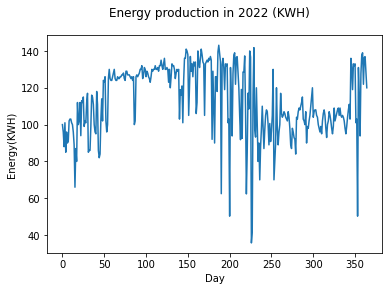

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.ylabel('Energy(KWH)')
plt.xlabel('Day')
plt.suptitle('Energy production in 2022 (KWH)')

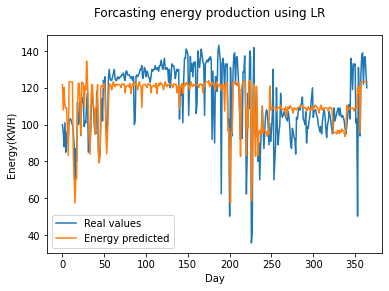

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(y_pred_lr_total)
plt.ylabel('Energy(KWH)')
plt.xlabel('Day')
plt.suptitle('Forcasting energy production using LR')
plt.legend(['Real values', 'Energy predicted'])

In [ ]:
X_train.shape
y_train.shape

(255,)

In [ ]:
reg.coef_

array([ 1.52865779, 12.69213613])

Implementation de l'Algorithm SVM


# Energie = 1.528 * irradiation + 12.692 * température 

In [ ]:
from itertools import chain

def my_grid_result_df(grid_result):
    rmses = grid_result.cv_results_['mean_test_RMSE']
    maes = grid_result.cv_results_['mean_test_MAE']
    times=grid_result.cv_results_['mean_score_time']
    params = grid_result.cv_results_['params']
    zipSorted=sorted(zip(rmses,maes,times, params),key = lambda t: t[0],reverse=True)
    my_dict=params
    my_data=[]
    for rmse, mae,time, param in zipSorted:
        score={"RMSE":rmse,"MAE":mae,"time":time} 
        my_data_tmp =  dict(chain.from_iterable(d.items() for d in (score, param)))
        my_data.append(my_data_tmp)
    return pd.DataFrame(data=my_data)

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVR

reg = SVR()
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} 

scoring = {'RMSE':'neg_mean_squared_error','MAE':'neg_mean_absolute_error'}


parameters = {'kernel':('linear', 'rbf','sigmoid','poly'),'degree':[3,4,5] ,'C':[1,2,3,4,5, 10],'gamma':('scale','auto')}

search = GridSearchCV(reg, parameters, scoring=scoring, n_jobs=1, cv=5, refit="RMSE")
grid_result = search.fit(X, y)


In [ ]:
my_grid_result_df(grid_result)

,RMSE,MAE,time,C,degree,gamma,kernel
0,-2.011008e+02,-9.718744,0.002868,10,3,auto,rbf
1,-2.011008e+02,-9.718744,0.002985,10,4,auto,rbf
2,-2.011008e+02,-9.718744,0.005083,10,5,auto,rbf
3,-2.018359e+02,-10.463655,0.002733,3,4,scale,poly
4,-2.024428e+02,-10.434099,0.003323,1,5,scale,poly
...,...,...,...,...,...,...,...
139,-3.283268e+10,-135717.488790,0.003154,2,5,auto,poly
140,-6.732176e+10,-190710.064917,0.003514,3,5,auto,poly
141,-2.498079e+11,-406227.336875,0.003368,4,5,auto,poly
142,-2.614083e+11,-398266.465586,0.003003,5,5,auto,poly


In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
regr = make_pipeline(StandardScaler(), SVR(kernel='rbf',C=10, epsilon=0.2,degree=3, gamma='auto'))
reg2=regr.fit(X_train, y_train)


Prediction with SVR

In [ ]:
y_pred_svr = reg2.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred_svr)

179.09466731490895

In [ ]:
r2_score(y_test,y_pred_svr)

0.49613040736165226

In [ ]:
mean_absolute_error(y_test,y_pred_svr)

8.82490216443711

In [ ]:
mean_absolute_percentage_error(y_test,y_pred_svr)

0.0914216852127349

In [ ]:
from sklearn import svm
regr_svm = svm.SVR()
reg2_svm=regr_svm.fit(X_train, y_train)
SVR()


SVR()

In [ ]:
y_pred_svm = reg2_svm.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred_svm)

290.89058897608976

In [ ]:
y_pred_svr_total = reg2.predict(X)

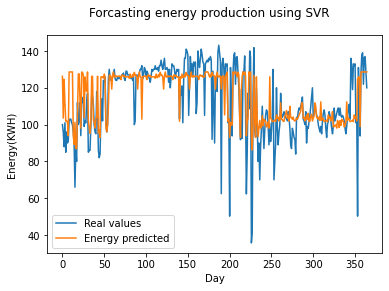

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(y_pred_svr_total)
plt.ylabel('Energy(KWH)')
plt.xlabel('Day')
plt.suptitle('Forcasting energy production using SVR')
plt.legend(['Real values', 'Energy predicted'])

In [ ]:
mean_squared_error(y_test,y_pred_ann)

2.640405588557375e-08

In [ ]:
r2_score(y_test,y_pred_ann)

0.9999999999991053

In [ ]:
mean_absolute_percentage_error(y_test,y_pred_ann)

5.277672060785039e-06

In [ ]:
mean_absolute_error(y_test,y_pred_ann)

0.00012925673607139254

In [ ]:
y_pred_ann_total = ann_cv.predict(X)

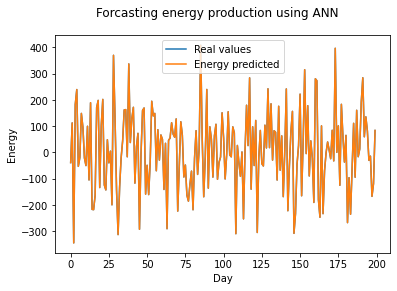

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(y_pred_ann_total)
plt.ylabel('Energy')
plt.xlabel('Day')
plt.suptitle('Forcasting energy production using ANN')
plt.legend(['Real values', 'Energy predicted'])

Random Forest

In [ ]:
#train random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
              'max_depth': [70],
              'max_features': ['auto'],
              'min_samples_leaf': [4],
              'min_samples_split': [10],
              'n_estimators': [400]}
              
forest = RandomForestRegressor()
grid_search = GridSearchCV(forest, parameters, cv=5, verbose=0)
forest_cv = grid_search.fit(X_train, y_train)
y_pred_rf = forest_cv.predict(X_test)
print("RMSE:", mean_squared_error(y_test,y_pred_rf))
print("MAE:", mean_absolute_error(y_test,y_pred_rf))
print("MAPE:", mean_absolute_percentage_error(y_test,y_pred_rf))
print("R2:", r2_score(y_test,y_pred_rf))

RMSE: 168.87615469119558
MAE: 9.175437298408772
MAPE: 0.09061539465542201
R2: 0.5248794364102221


NameError: ignored

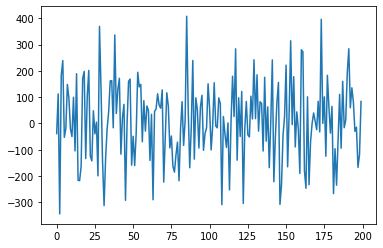

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(y_pred_rf_total)
plt.ylabel('Energy(KWH)')
plt.xlabel('Day')
plt.suptitle('Forcasting energy production using RF')
plt.legend(['Real values', 'Energy predicted'])

# XGBOOST


In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.05,0,1,0.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [1,4,10,100],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100,400,500,800]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[09:46:08] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=5,
             param_grid={'colsample_by

In [ ]:
xgboost_cv = xgb_grid.fit(X_train,y_train)
y_pred_xgboost = xgboost_cv.predict(X_test)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[09:54:14] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


NameError: ignored

In [ ]:
y_pred_xgboost_total = xgboost_cv.predict(X)
                                    

In [ ]:
print("RMSE:", mean_squared_error(y_test,y_pred_xgboost))
print("MAE:", mean_absolute_error(y_test,y_pred_xgboost))
print("MAPE:", mean_absolute_percentage_error(y_test,y_pred_xgboost))
print("R2:", r2_score(y_test,y_pred_xgboost))
y_pred_xgboost_total = xgboost_cv.predict(X)

RMSE: 167.2562510103582
MAE: 9.273811151677911
MAPE: 0.09025341265158049
R2: 0.5294369155357267


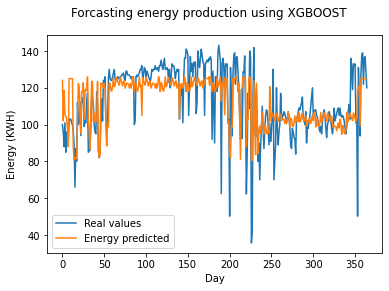

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(y_pred_xgboost_total)
plt.ylabel('Energy (KWH)')
plt.xlabel('Day')
plt.suptitle('Forcasting energy production using XGBOOST')
plt.legend(['Real values', 'Energy predicted'])

Decision tree

In [ ]:
#train decision tree
from sklearn.tree import DecisionTreeRegressor
parameters = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1,10)],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}
tree = DecisionTreeRegressor()
grid_search = GridSearchCV(tree, parameters, cv=5, verbose=0)
tree_cv = grid_search.fit(X_train, y_train)


Tuned hpyerparameters (best parameters): {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Train accuracy: 0.46653524042268923
Test accuracy: 0.4789550556920431


In [ ]:
y_pred_dt = tree_cv.predict(X_test)
y_pred_dt_total = tree_cv.predict(X)

In [ ]:
print("RMSE:", mean_squared_error(y_test,y_pred_dt))
print("MAE:", mean_absolute_error(y_test,y_pred_dt))
print("MAPE:", mean_absolute_percentage_error(y_test,y_pred_dt))
print("R2:", r2_score(y_test,y_pred_dt))

RMSE: 185.19944906444593
MAE: 9.931824444330374
MAPE: 0.09784197156487555
R2: 0.4789550556920431


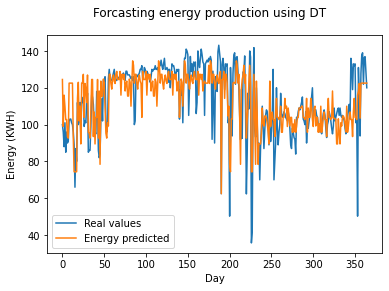

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(y_pred_dt_total)
plt.ylabel('Energy (KWH)')
plt.xlabel('Day')
plt.suptitle('Forcasting energy production using DT')
plt.legend(['Real values', 'Energy predicted'])

In [ ]:
x=[ 'LR','SVR','ANN','DT','RF','XGBOOST']
rmse=[178.15, 179.094, 2.6e-08, 185.199, 168.87, 167.26]
mae =[0.179, 8.825, 0.00013, 9.93, 9.17, 9.27]
mape=[0.099, 0.0914, 5.3e-06, 0.098, 0.09, 0.09]
r2=[0.49, 0.496, 0.99,0.479,0.525, 0.529]


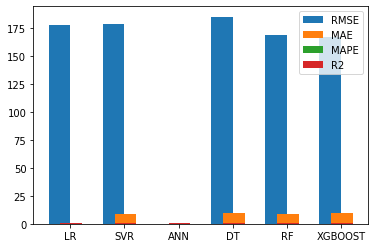

In [ ]:
x_axis = np.arange(len(Algorihtm))

# Multi bar Chart

plt.bar(x_axis -0.2, RMSE, width=0.4, label = 'RMSE')
plt.bar(x_axis +0.02, MAE, width=0.4, label = 'MAE')
plt.bar(x_axis -0.002, MAPE, width=0.4, label = 'MAPE')
plt.bar(x_axis +0.02, R2, width=0.4, label = 'R2')

# Xticks

plt.xticks(x_axis, Algorihtm)

# Add legend

plt.legend()

# Display

plt.show()

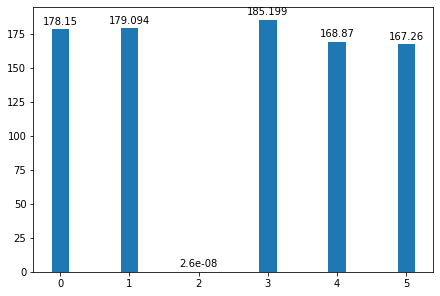

In [ ]:


species = ("LR", "SVR", "ANN", "DT", "RF", "XGBOOST")
penguin_means = {
    'rmse': (178.15, 179.094, 2.6e-08, 185.199, 168.87, 167.26),
    'mae': (0.179, 8.825, 0.00013, 9.93, 9.17, 9.27),
    'mape': (0.099, 0.0914, 5.3e-06, 0.098, 0.09, 0.09),
    'r2': (0.49, 0.496, 0.99,0.479,0.525, 0.529),
}
x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

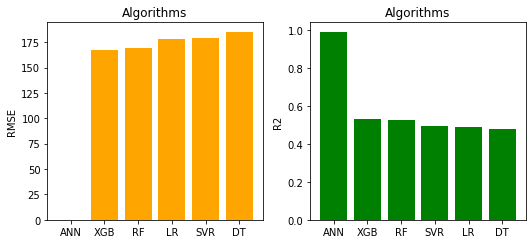

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt


df = pd.DataFrame(
   dict(
       x=[ 'LR','SVR','ANN','DT','RF','XGB'],
      rmse=[178.15, 179.094, 2.6e-08, 185.199, 168.87, 167.26],
      mae =[0.179, 8.825, 0.00013, 9.93, 9.17, 9.27],
      mape=[0.099, 0.0914, 5.3e-06, 0.098, 0.09, 0.09],
      r2=[0.49, 0.496, 0.99,0.479,0.525, 0.529]
   )
)

plt.subplot(121)
df_sort= df.sort_values('rmse',ascending=True)
plt.bar('x', 'rmse', data=df_sort, color='orange')
plt.ylabel("RMSE")
plt.title("Algorithms")
plt.legend("Top three algorithms by ranking")

plt.subplot(122)
df_sorted = df.sort_values('r2',ascending=False)
plt.bar('x', 'r2', data=df_sorted, color='green')
plt.ylabel("R2")
plt.title("Algorithms")

plt.show()

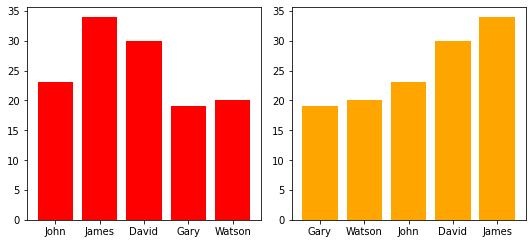

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

df = pd.DataFrame(
   dict(
      names=['John', 'James', 'David', 'Gary', 'Watson'],
      marks=[23, 34, 30, 19, 20]
   )
)

plt.subplot(121)
plt.bar('names', 'marks', data=df, color='red')

plt.subplot(122)
df_sorted = df.sort_values('marks')
plt.bar('names', 'marks', data=df_sorted, color='orange')

plt.show()

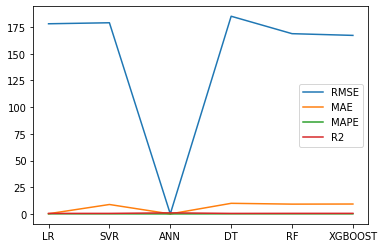

In [ ]:
plt.plot(x, rmse, label = "RMSE")
plt.plot(x, mae, label = "MAE")
plt.plot(x, mape, label = "MAPE")
plt.plot(x, r2, label = "R2")
plt.legend()
plt.show()

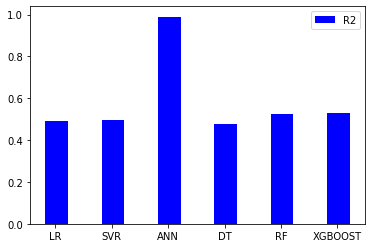

In [ ]:
x_axis = np.arange(len(Algorihtm))

# Multi bar Chart

plt.bar(x_axis +0.02, r2, width=0.4, label = 'R2',color="Blue")

# Xticks

plt.xticks(x_axis, x)

# Add legend

plt.legend()

# Display

plt.show()

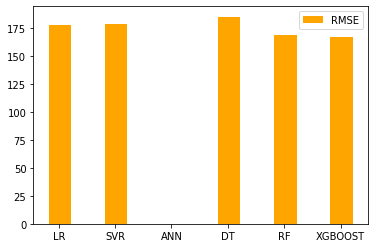

In [ ]:
x_axis = np.arange(len(Algorihtm))

# Multi bar Chart

plt.bar(x_axis +0.02, rmse, width=0.4, label = 'RMSE', color="orange")

# Xticks

plt.xticks(x_axis, x)

# Add legend

plt.legend()

# Display

plt.show()

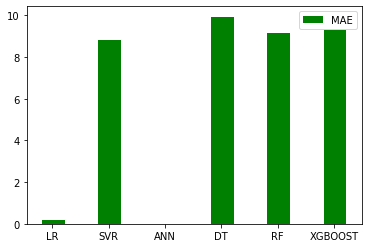

In [ ]:
x_axis = np.arange(len(Algorihtm))

# Multi bar Chart

plt.bar(x_axis +0.02, mae, width=0.4, label = 'MAE', color="green")


# Xticks

plt.xticks(x_axis, x)

# Add legend

plt.legend()

# Display

plt.show()

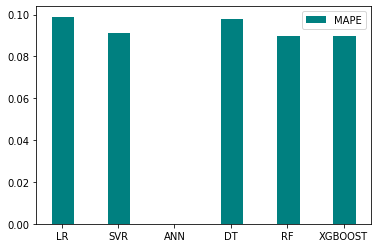

In [ ]:
x_axis = np.arange(len(Algorihtm))

# Multi bar Chart

plt.bar(x_axis +0.02, mape, width=0.4, label = 'MAPE', color="Teal")

# Xticks

plt.xticks(x_axis, x)

# Add legend

plt.legend()

# Display

plt.show()